# Online Retail II Data Set


### 1. Problem Definition
> Cluster dataset to save company money on ads.

### 2. Data

1 file with 2 worksheets.

Attribute Information:

* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal. The name of the country where a customer resides.

### 3. Evaluation

Explaination of different clustering techniques by **Real Python**:

`Partitional` (i.e. K-Means) clustering methods have several strengths:
* They work well when clusters have a spherical shape.
* They’re scalable with respect to algorithm complexity.

They also have several weaknesses:
* They’re not well suited for clusters with complex shapes and different sizes.
* They break down when used with clusters of different densities.
---
The strengths of `hierarchical` clustering methods include the following:
* They often reveal the finer details about the relationships between data objects.
* They provide an interpretable dendrogram.

The weaknesses of hierarchical clustering methods include the following:
* They’re computationally expensive with respect to algorithm complexity.
* They’re sensitive to noise and outliers.
---
The strengths of `density-based` clustering methods include the following:
* They excel at identifying clusters of nonspherical shapes.
* They’re resistant to outliers.

The weaknesses of density-based clustering methods include the following:
* They aren’t well suited for clustering in high-dimensional spaces.
* They have trouble identifying clusters of varying densities.

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statistics

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [72]:
retail1 = pd.read_excel('C:/Users/xavie/Downloads/online_retail_II.xlsx',
                       sheet_name = 'Year 2009-2010')
retail2 = pd.read_excel('C:/Users/xavie/Downloads/online_retail_II.xlsx',
                       sheet_name = 'Year 2010-2011')
df = [retail1, retail2]

retail = pd.concat(df)

retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [73]:
# retail.describe()
# retail.isna().sum()
# retail.info()

retail['Total Revenue'] = retail['Quantity'] * retail['Price']

retail = retail.drop('Quantity', axis = 1)
retail = retail.drop('Price', axis = 1)
retail = retail.drop('Description', axis = 1)

retail.dropna(subset = ['Customer ID'], inplace = True)
retail.drop_duplicates(keep = False, inplace = True)

retail.isna().sum()

Invoice          0
StockCode        0
InvoiceDate      0
Customer ID      0
Country          0
Total Revenue    0
dtype: int64

In [75]:
retail.to_excel('Retail_2009-11.xlsx')

In [5]:
retail = pd.read_excel('C:/Users/xavie/Downloads/Retail_2009-11.xlsx',
                       sheet_name = 'Sheet1')

In [6]:
retail

,Unnamed: 0,Invoice,StockCode,InvoiceDate,Customer ID,Country,Total Revenue
0,0,489434,85048,2009-12-01 07:45:00,13085,United Kingdom,83.40
1,1,489434,79323P,2009-12-01 07:45:00,13085,United Kingdom,81.00
2,2,489434,79323W,2009-12-01 07:45:00,13085,United Kingdom,81.00
3,3,489434,22041,2009-12-01 07:45:00,13085,United Kingdom,100.80
4,4,489434,21232,2009-12-01 07:45:00,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...
772813,541905,581587,22899,2011-12-09 12:50:00,12680,France,12.60
772814,541906,581587,23254,2011-12-09 12:50:00,12680,France,16.60
772815,541907,581587,23255,2011-12-09 12:50:00,12680,France,16.60
772816,541908,581587,22138,2011-12-09 12:50:00,12680,France,14.85


In [7]:
retail = retail.drop('Unnamed: 0', axis = 1)
retail.head()

,Invoice,StockCode,InvoiceDate,Customer ID,Country,Total Revenue
0,489434,85048,2009-12-01 07:45:00,13085,United Kingdom,83.4
1,489434,79323P,2009-12-01 07:45:00,13085,United Kingdom,81.0
2,489434,79323W,2009-12-01 07:45:00,13085,United Kingdom,81.0
3,489434,22041,2009-12-01 07:45:00,13085,United Kingdom,100.8
4,489434,21232,2009-12-01 07:45:00,13085,United Kingdom,30.0


### Feature Engineering for Clustering DataFrame

In [131]:
# Dataframe for clustering

retail['Customer ID'] = retail['Customer ID'].astype(str)

# How much each each customer has spent with us
k_df1 = retail.groupby('Customer ID')['Total Revenue'].sum().reset_index()

# How often a customer purchases goods from us
k_df2 = retail.groupby('Customer ID')['Invoice'].count().reset_index()
k_df2.columns = ['Customer ID', 'Visits']

# Latest transaction of each customer
last_visit = retail['InvoiceDate'].max()
retail['Last Transaction'] = last_visit - retail['InvoiceDate']
k_df3 = retail.groupby('Customer ID')['Last Transaction'].min().reset_index()
k_df3['Last Transaction'] = k_df3['Last Transaction'].dt.days

# Merge the dataframes into one dataframe for clustering
k_df = pd.merge(k_df1, k_df2, on='Customer ID', how='inner')
k_df = pd.merge(k_df, k_df3, on='Customer ID', how='inner')

k_df.head()

,Customer ID,Total Revenue,Visits,Last Transaction
0,12346,-38.80,46,325
1,12347,4209.74,191,1
2,12348,2019.40,51,74
3,12349,4404.54,180,18
4,12350,334.40,17,309


**Issue(s):**

   * Total Revenue has a negative value 
        > The issue may be a refund, but turn negative values to the median to keep from skewing the central tendency of the total revenue.

In [29]:
k_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5921 entries, 0 to 5920
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       5921 non-null   object 
 1   Total Revenue     5921 non-null   float64
 2   Visits            5921 non-null   int64  
 3   Last Transaction  5921 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 231.3+ KB


In [132]:
# Replace less than 0 with median of k_df
# Do the same thing for retail['Total Revenue']
lst = []

for i in k_df['Total Revenue']:
    if i < 0:
        lst.append(statistics.median(k_df['Total Revenue']))
    else: 
        lst.append(i)
print(lst)

[812.5000000000001, 4209.739999999999, 2019.4, 4404.540000000003, 334.40000000000003, 300.93, 1889.2100000000003, 406.75999999999993, 1079.3999999999999, 947.61, 6369.779999999995, 18287.659999999993, 3887.070000000003, 8589.789999999997, 4212.890000000001, 511.24999999999994, 5284.580000000002, 552.0, 1313.1000000000001, 320.68999999999994, 500.24, 168.9, 917.6999999999999, 1791.15, 4312.809999999998, 4067.3799999999983, 1298.0400000000002, 1127.65, 2989.2200000000003, 455.42000000000013, 503.15, 3426.319999999998, 5416.32, 1618.27, 7888.0000000000055, 1803.9600000000003, 812.5000000000001, 1839.3099999999997, 566.16, 1923.3999999999999, 143.0, 143.94, 3901.110000000001, 1433.33, 549.8399999999999, 2660.7099999999937, 234.75000000000003, 2376.7499999999995, 1272.48, 4354.7199999999975, 931.4300000000006, 2409.9000000000005, 1635.6599999999999, 1962.3000000000013, 205.25, 84.3, 1244.1500000000003, 1001.36, 63.24, 1710.3900000000006, 6072.209999999998, 1708.1199999999997, 4279.640000000

In [54]:
print(statistics.median(k_df['Total Revenue']))

812.5000000000001


In [133]:
k_df['Total Revenue'] = pd.DataFrame(lst)
k_df.head()

,Customer ID,Total Revenue,Visits,Last Transaction
0,12346,812.50,46,325
1,12347,4209.74,191,1
2,12348,2019.40,51,74
3,12349,4404.54,180,18
4,12350,334.40,17,309


In [135]:
# May use this dataset: it summarizes the retail datset with new features
k_df.shape

(5921, 4)

### Outlier Analysis

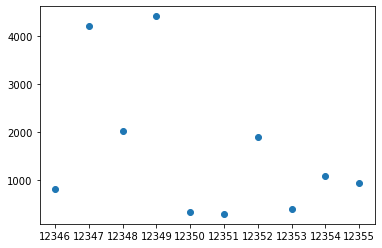

In [68]:
fig, ax = plt.subplots()
ax.scatter(k_df['Customer ID'][:10], k_df['Total Revenue'][:10]); 

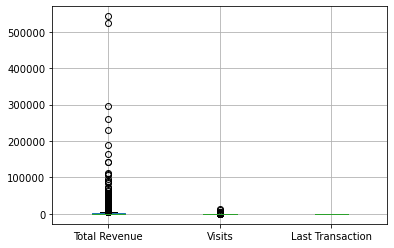

In [80]:
k_df.boxplot(column = ['Total Revenue', 'Visits', 'Last Transaction']);

In [107]:
k_df.shape

(5921, 4)

In [136]:
Q1 = np.percentile(k_df['Total Revenue'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(k_df['Total Revenue'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1

upper = np.where(k_df['Total Revenue'] >= (Q3+1.5*IQR))
lower = np.where(k_df['Total Revenue'] <= (Q1-1.5*IQR))

k_df.drop(upper[0], inplace = True)
k_df.drop(lower[0], inplace = True)

In [141]:
k_df.shape

(5287, 4)

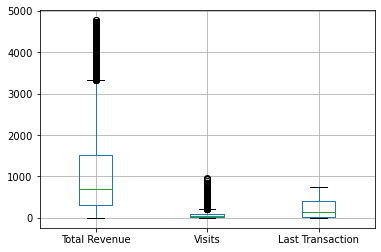

In [139]:
k_df.boxplot(column = ['Total Revenue', 'Visits', 'Last Transaction']);

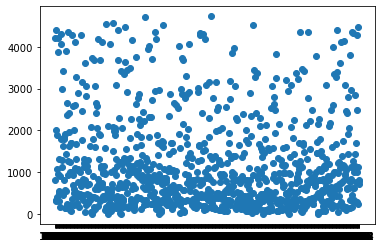

In [151]:
fig, ax = plt.subplots()
ax.scatter(k_df['Customer ID'][:1000], k_df['Total Revenue'][:1000]);

**Possible Issue**
> A lot of outliers left behind.

### Scaling Data for Clustering

Rules of thumb [Krish Naik (YouTube)]:
* Scaling is necessary for most models, besides random forest and boosts.
* Most of deep learning, use MinMax Scaler, but use Standard Scaler outside of this.

In [220]:
X = k_df.drop('Customer ID', axis = 1)
X = StandardScaler().fit_transform(X)

y = k_df['Customer ID']

### Clustering Data

**K-Means Clustering**

In [221]:
kmeans = KMeans(
                init = "random",
                n_clusters = 3,
                n_init = 10,
                max_iter = 300,
                random_state = 42
                )
kmeans.fit(X)

KMeans(init='random', n_clusters=3, random_state=42)

In [222]:
 # The lowest SSE value
kmeans.inertia_

5460.333220819335

In [223]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25495713, -0.23381314, -0.62649445],
       [ 1.74019446,  1.53834725, -0.68758862],
       [-0.53977424, -0.46565012,  1.20679309]])

In [224]:
# The number of iterations required to converge
kmeans.n_iter_

12

### Two Methods of Evaluating Cluster
1. The Elbow Method
2. The Silhouette Coefficient

According to the website, **Real Python**:

"These are often used as complementary evaluation techniques rather than one being preferred over the other. To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE"

Sum of the Squared Error (SSE) is used to measure the clustering performance.

**Elbow Method**

In [225]:
kmeans_kwargs = {
                "init": "random",
                "n_init": 10,
                "max_iter": 300,
                "random_state": 42,
                }

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

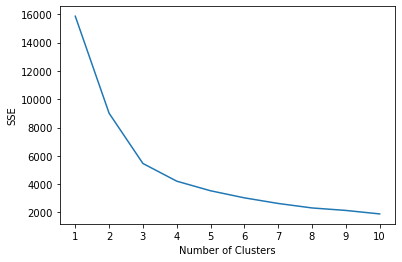

In [226]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [227]:
kl = KneeLocator(
                range(1, 11), sse, curve = "convex", 
                direction = "decreasing"
                )

kl.elbow

3

**Silhouette Method**

Measures the cohesion and separation of a cluster, by defining how well a data point fits in a cluster. 

Two Factors/ Questions:
1. How close is the data point to other data points in the cluster?
2. How far away is the data point from other data points in other clusters?

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score. The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

Loop through values of k again. This time, instead of computing SSE, compute the silhouette coefficient.

In [228]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

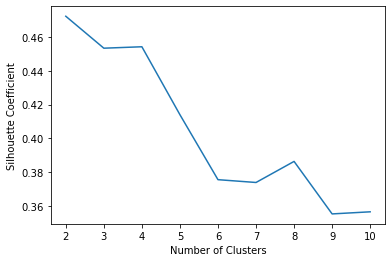

In [229]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

The plot of the average silhouette scores for each k shows that the best **number of clusters is 4** because it has the highest silhouette coefficient, but 3 is really close. Consider domain knowledge and clustering evaluation metrics when choosing the number of clusters.

**Hierarchal Clustering (with use of K-Means)**

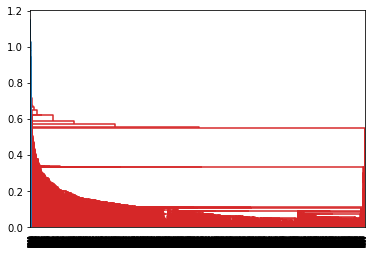

In [270]:
# Focuses on the shortest distance between two points in each cluster
single_linkage = linkage(X, method="single", metric='euclidean')
dendrogram(single_linkage)
plt.show()

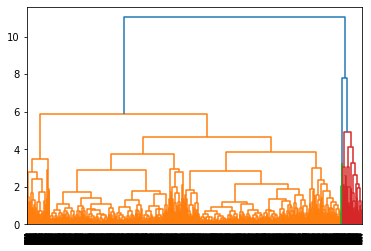

In [271]:
# Focuses on the longest distance between two points in each cluster
complete_linkage = linkage(X, method="complete", metric='euclidean')
dendrogram(complete_linkage)
plt.show()

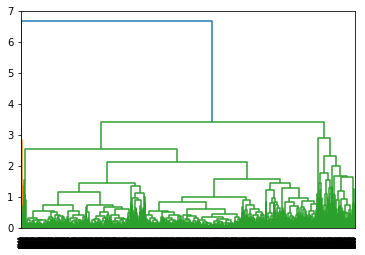

In [272]:
# Focuses on the average distance between each point in one cluster 
# to every point in the other cluster
avg_linkage = linkage(X, method="average", metric='euclidean')
dendrogram(avg_linkage)
plt.show()

In [273]:
# Use cluster findings from kmeans and cut the dendrogram based on k
clusters = cut_tree(avg_linkage, n_clusters = 3).reshape(-1, )
k_df['Clusters Hier'] = clusters
k_df.head()

,Customer ID,Total Revenue,Visits,Last Transaction,Clusters Hier
0,12346,812.50,46,325,0
1,12347,4209.74,191,1,1
2,12348,2019.40,51,74,0
3,12349,4404.54,180,18,1
4,12350,334.40,17,309,0


**DBSCAN Clustering (with use of K-Means)**

In [250]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters = 3)
dbscan = DBSCAN(eps = 0.3)

# Fit the algorithms to the features
kmeans.fit(X)
dbscan.fit(X)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
                                    X, kmeans.labels_
                                    ).round(2)
dbscan_silhouette = silhouette_score(
                                    X, dbscan.labels_
                                    ).round (2)

In [251]:
kmeans_silhouette

0.45

In [252]:
dbscan_silhouette

0.01

The coefficient is much high for the kmeans algorithm.

In [275]:
pred = kmeans.predict(X)
k_df['Clusters K'] = pred
k_df['Clusters K'].value_counts()

0    2511
2    1835
1     941
Name: Clusters K, dtype: int64

In [278]:
k_df.head(15)

,Customer ID,Total Revenue,Visits,Last Transaction,Clusters Hier,Clusters K
0,12346,812.50,46,325,0,2
1,12347,4209.74,191,1,1,1
2,12348,2019.40,51,74,0,0
3,12349,4404.54,180,18,1,1
4,12350,334.40,17,309,0,2
5,12351,300.93,21,374,0,2
6,12352,1889.21,113,35,0,0
7,12353,406.76,24,203,0,0
8,12354,1079.40,58,231,0,0
9,12355,947.61,35,213,0,0


Hier and K agree on many clusters and disagrees on many clusters, but I assume that Hier struggles with cluster 2 due to outliers. Hierarchical clustering struggles with outliers, and my outlier removal still left quite a few behind. This could confuse hierarchical clustering in ways that may not be as significant to K-Means clustering.

**K-Means Plots**

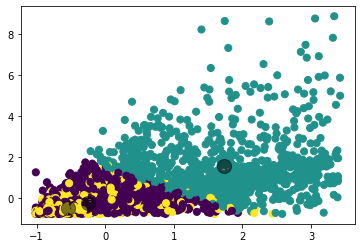

In [264]:
plt.scatter(X[: ,0], X[: ,1], c = pred, s = 50, cmap = 'viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[: ,0], centers[: ,1], c = 'black', s = 200, alpha = 0.5);

C:\Users\xavie\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\xavie\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\xavie\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\xavie\Anaconda3\

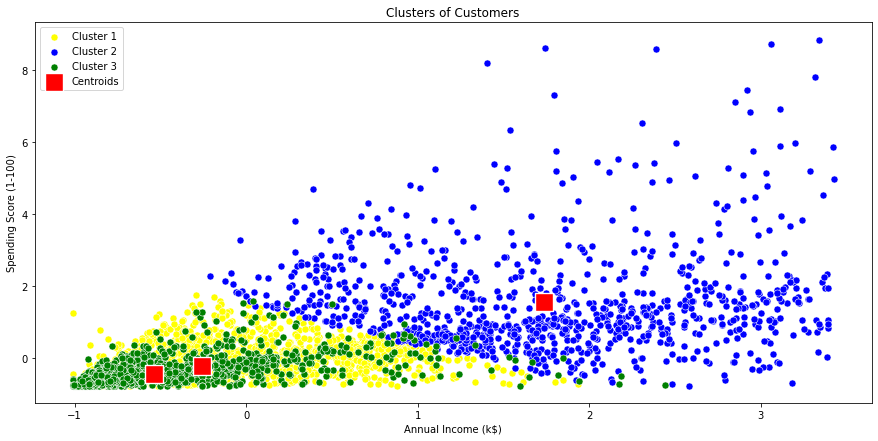

In [268]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[pred == 0, 0], X[pred == 0, 1],
                color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[pred == 1, 0], X[pred == 1, 1], 
                color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[pred == 2, 0], X[pred == 2, 1], 
                color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], 
                kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids', s = 300, marker = ',')
plt.grid(False)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show();

**Hierarchical Clustering Plots**

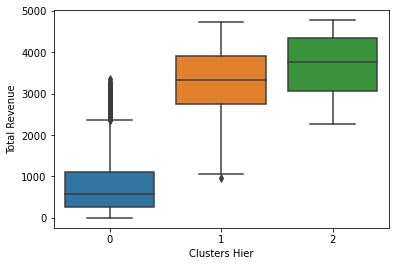

In [280]:
sns.boxplot(x = k_df['Clusters Hier'], y = k_df['Total Revenue']);

Customers in cluster 2 spent the most money, but customers in cluster 1 aren't very far behind in median.

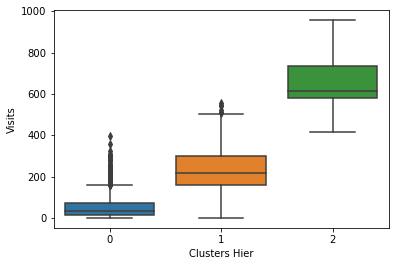

In [281]:
sns.boxplot(x = k_df['Clusters Hier'], y = k_df['Visits']);

Customers from cluster 2 comes a lot more often than those of the others.

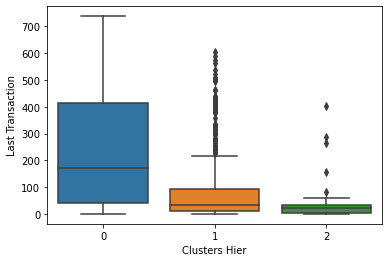

In [282]:
sns.boxplot(x = k_df['Clusters Hier'], y = k_df['Last Transaction']);

Customers of cluster 2 are the most recent buyers, for the most part.

### Conclusion

It is hard to cluster such a large dataset that lacks much to distinguish between clusters of customers, but with the findings, we could take this opportunity to focus advertisements on the top right cluster most(first plot: cluster 0; second plot: cluster 2). It has the most customers, and these customers hold the most interest in the online retail store. By focusing advertisement more towards them, we spend less on those that may not be as interested in this store.

Help company budget their advertisements by cutting back on the two bottom left clusters (clusters 0 and 1). Can still advertise, just less frequent than to the customers in the top right cluster.